Found 988 image-label pairs.
Training samples: 790
Testing samples: 198
Visualizing training samples...
x1 884 y1 235 x2 1268 y2 619
mask tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


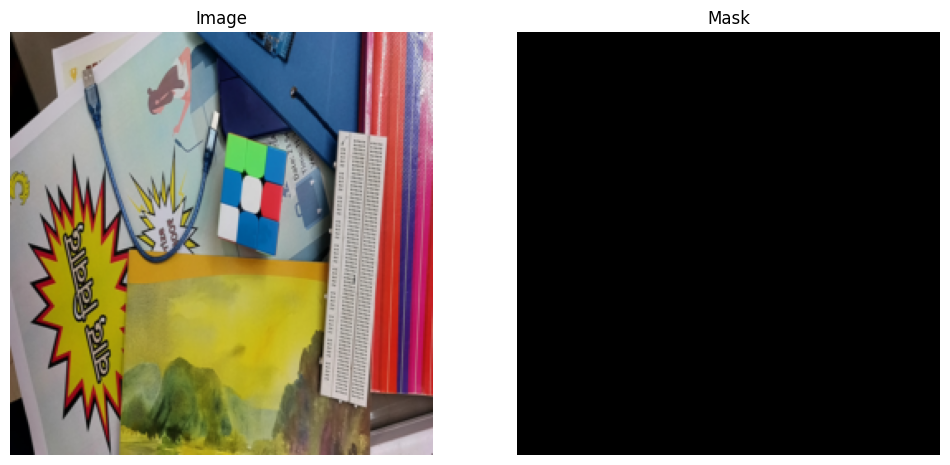

x1 852 y1 281 x2 1246 y2 675
mask tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


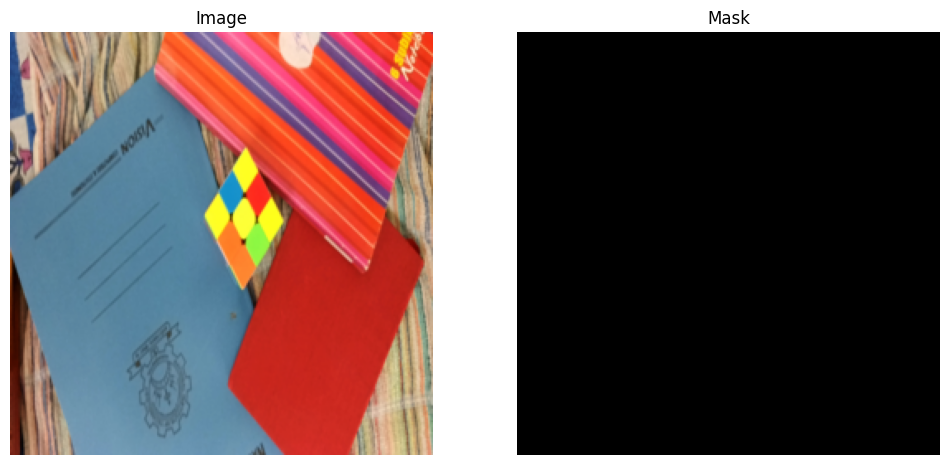

x1 928 y1 350 x2 1222 y2 644
mask tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


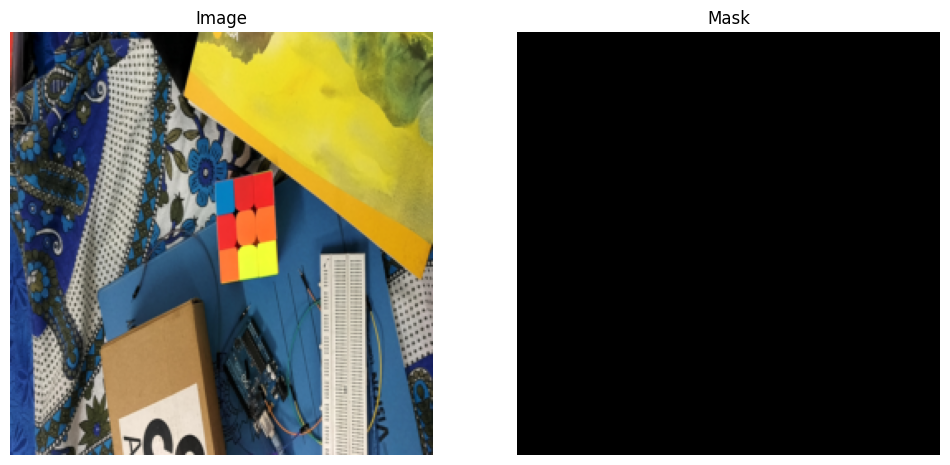

x1 856 y1 330 x2 1188 y2 662
mask tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


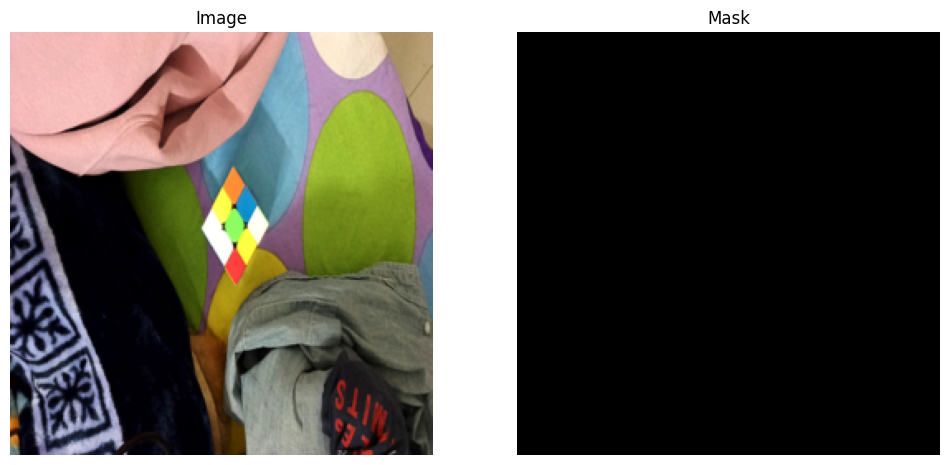

x1 884 y1 401 x2 1188 y2 705
mask tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


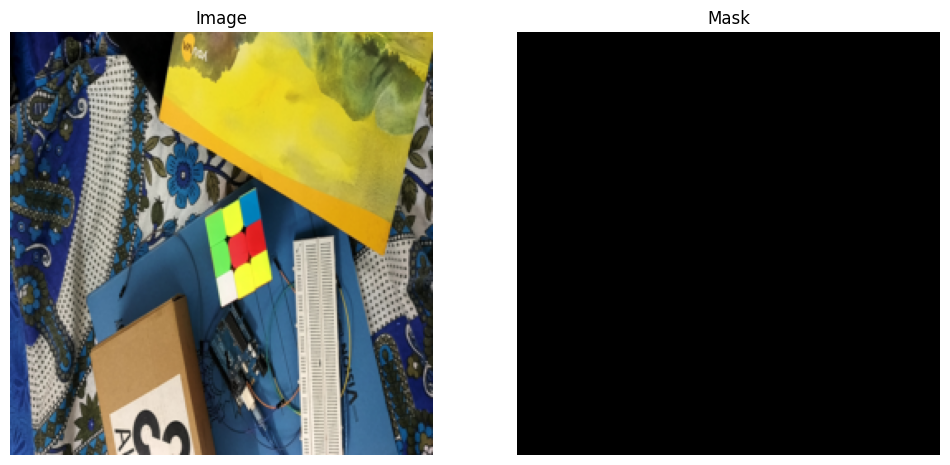

Visualizing testing samples...
x1 1103 y1 503 x2 1183 y2 583
mask tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


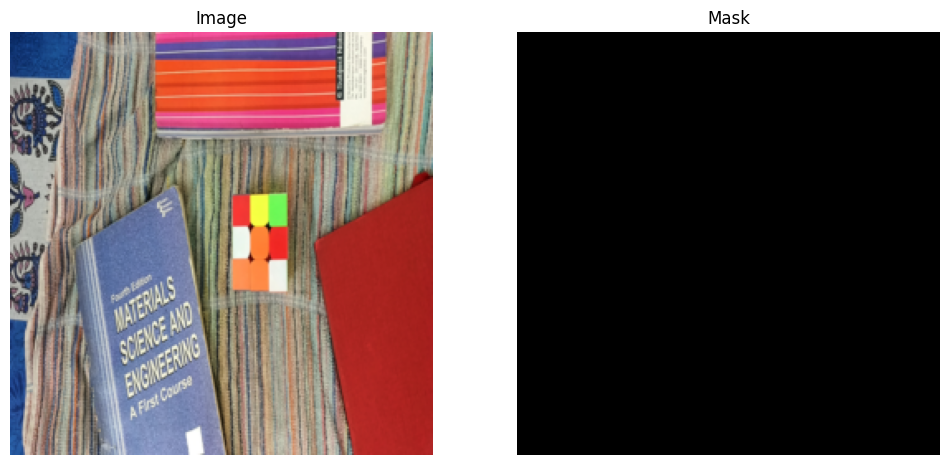

x1 921 y1 267 x2 1267 y2 613
mask tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


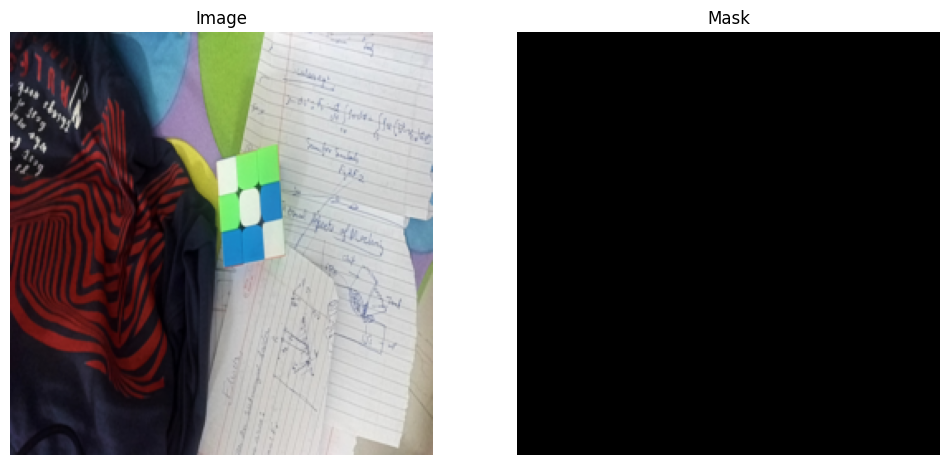

x1 1040 y1 325 x2 1350 y2 635
mask tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


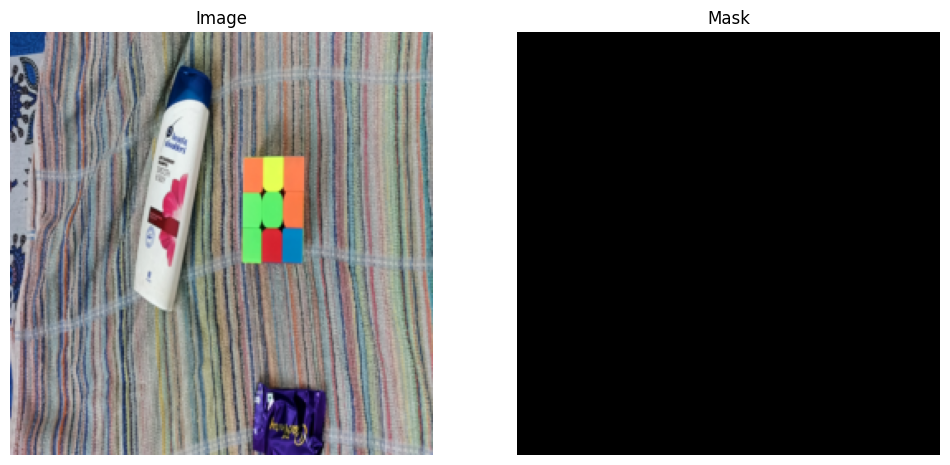

x1 982 y1 524 x2 1162 y2 704
mask tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


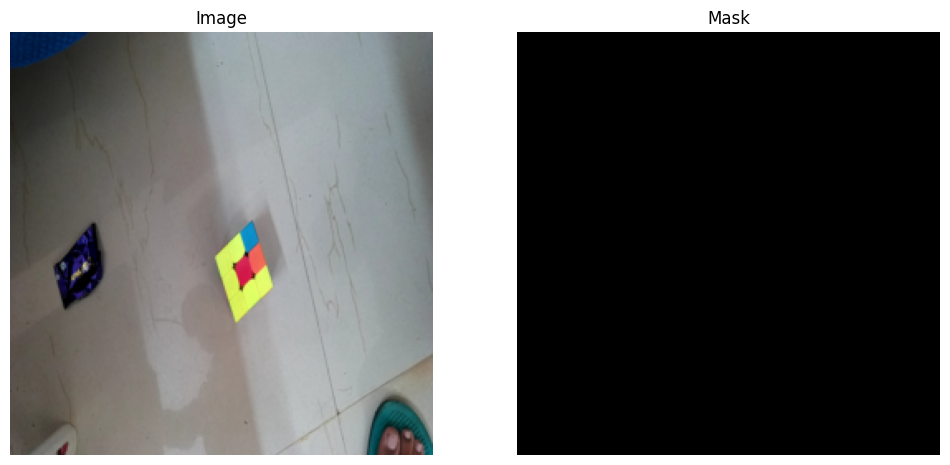

x1 841 y1 183 x2 1263 y2 605
mask tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


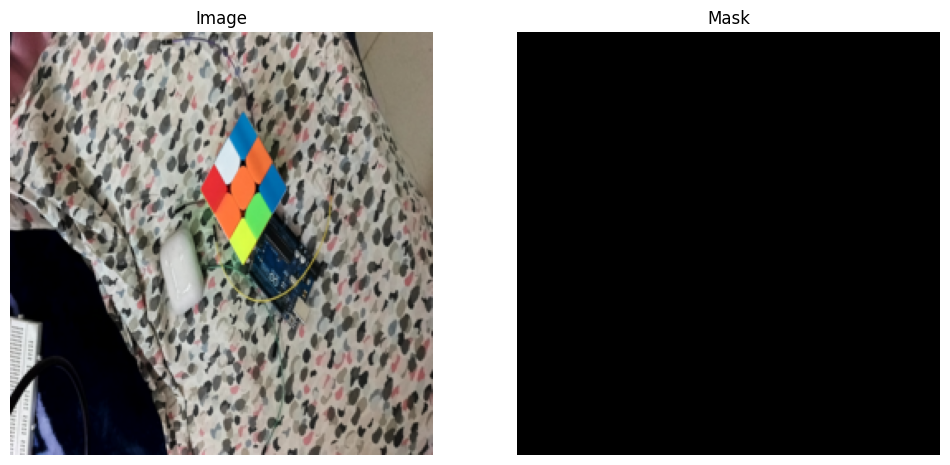

In [3]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from torchvision import transforms
import re
import random

# Helper Function
def extract_number(filename):
    """
    Extracts the numerical part from a filename.
    For example, '2.jpg' returns 2.
    """
    match = re.search(r'(\d+)', filename)
    if match:
        return int(match.group(1))
    else:
        return -1  # Return -1 if no number is found

# Custom Dataset Class
class RubiksCubeDataset(Dataset):
    def __init__(self, root_dir, transform=None, mask_transform=None):
        """
        Args:
            root_dir (string): Directory with 'images' and 'labels' folders.
            transform (callable, optional): Optional transform to be applied on an image.
            mask_transform (callable, optional): Optional transform to be applied on a mask.
        """
        self.root_dir = root_dir
        self.images_dir = os.path.join(root_dir, 'images')
        self.labels_dir = os.path.join(root_dir, 'labels')
        
        # List all image and label files
        image_files = [
            f for f in os.listdir(self.images_dir) 
            if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))
        ]
        label_files = [
            f for f in os.listdir(self.labels_dir) 
            if f.lower().endswith('.txt')
        ]
        
        # Extract numbers and create dictionaries
        image_dict = {extract_number(f): f for f in image_files}
        label_dict = {extract_number(f): f for f in label_files}
        
        # Find common keys to ensure pairing
        common_keys = sorted(list(set(image_dict.keys()) & set(label_dict.keys())))
        
        if not common_keys:
            raise ValueError("No matching image and label files found.")
        
        # Create sorted lists based on numerical order
        self.image_files = [image_dict[k] for k in common_keys]
        self.label_files = [label_dict[k] for k in common_keys]
        
        self.transform = transform
        self.mask_transform = mask_transform
        
        print(f"Found {len(self.image_files)} image-label pairs.")
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        # Get image and label filenames
        img_name = self.image_files[idx]
        label_name = self.label_files[idx]
        
        # Full paths
        img_path = os.path.join(self.images_dir, img_name)
        label_path = os.path.join(self.labels_dir, label_name)
        
        # Load image
        image = Image.open(img_path).convert('RGB')
        width, height = image.size
        
        # Load and parse label
        with open(label_path, 'r') as f:
            lines = f.readlines()
        
        mask = np.zeros((height, width), dtype=np.uint8)
        
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 5:
                class_id = parts[0]
                if class_id != '0':
                    continue  # Skip other classes if any
                try:
                    # Parse YOLO format: class_id x_center y_center width height
                    x_center_norm, y_center_norm, box_width_norm, box_height_norm = map(float, parts[1:5])
                    
                    # Convert normalized coordinates to pixel values
                    x_center = int(x_center_norm * width)
                    y_center = int(y_center_norm * height)
                    box_width = int(box_width_norm * width)
                    box_height = int(box_height_norm * height)
                    
                    # Enforce square by taking the smaller dimension
                    min_dim = min(box_width, box_height)
                    half_min_dim = min_dim // 2
                    
                    # Calculate top-left and bottom-right coordinates for square
                    x1 = x_center - half_min_dim
                    y1 = y_center - half_min_dim
                    x2 = x_center + half_min_dim
                    y2 = y_center + half_min_dim
                    
                    # Ensure coordinates are within image boundaries
                    x1, x2 = max(0, min(x1, width - 1)), max(0, min(x2, width - 1))
                    y1, y2 = max(0, min(y1, height - 1)), max(0, min(y2, height - 1))
                    
                    print("x1", x1, "y1", y1, "x2", x2, "y2", y2)
                    # Draw filled square on mask
                    cv2.rectangle(mask, (x1, y1), (x2, y2), color=255, thickness=-1)
                except ValueError:
                    print(f"Invalid label format in file {label_name}: '{line}'")
            else:
                print(f"Incomplete label information in file {label_name}: '{line}'")
        
        mask = Image.fromarray(mask)
        
        # Apply transformations if any
        if self.transform:
            image = self.transform(image)
        if self.mask_transform:
            mask = self.mask_transform(mask)
        
        return image, mask

# Define Transformations
image_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

mask_transforms = transforms.Compose([
    transforms.Resize((256, 256), interpolation=Image.NEAREST),
    transforms.ToTensor()
])

# Initialize Dataset
try:
    dataset = RubiksCubeDataset(
        root_dir='archive',  # Update this path if necessary
        transform=image_transforms,
        mask_transform=mask_transforms
    )
except ValueError as ve:
    print(ve)
    exit(1)

# Split into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

print(f"Training samples: {len(train_dataset)}")
print(f"Testing samples: {len(test_dataset)}")

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)

# Visualization Functions
def denormalize(image_tensor, mean, std):
    """
    Denormalizes a tensor image using mean and std.
    """
    for t, m, s in zip(image_tensor, mean, std):
        t.mul_(s).add_(m)
    return image_tensor

def visualize_samples(dataset, num_samples=5):
    """
    Visualizes a specified number of samples from the dataset.
    
    Args:
        dataset (Dataset): The dataset to visualize from.
        num_samples (int): Number of samples to visualize.
    """
    indices = random.sample(range(len(dataset)), num_samples)
    
    
    for idx in indices:
        image, mask = dataset[idx]
        print("mask", mask)
        
        # Denormalize image for visualization
        image_vis = denormalize(image.clone(), mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
        image_vis = image_vis.permute(1, 2, 0).numpy()
        image_vis = np.clip(image_vis, 0, 1)
        
        # Convert mask to numpy
        mask_np = mask.squeeze().numpy()
        mask_np = (mask_np > 0.5).astype(np.float32)
        
        # Plotting
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.title('Image')
        plt.imshow(image_vis)
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.title('Mask')
        plt.imshow(mask_np, cmap='gray')
        plt.axis('off')
        
        plt.show()

# Visualize samples from the training set
print("Visualizing training samples...")
visualize_samples(train_dataset, num_samples=5)

# Visualize samples from the testing set
print("Visualizing testing samples...")
visualize_samples(test_dataset, num_samples=5)

Label file 72 (1).txt not found for image 72 (1).jpg
x1 1112 y1 100 x2 1510 y2 498


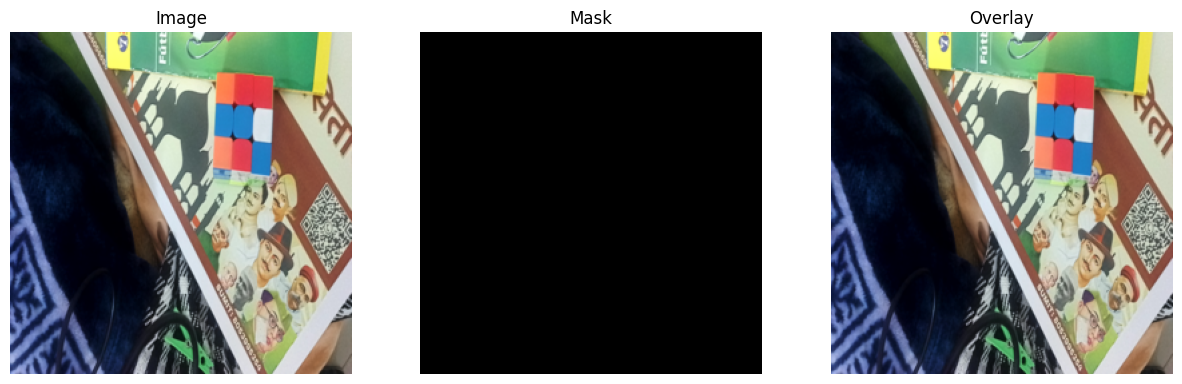

x1 851 y1 165 x2 1227 y2 541


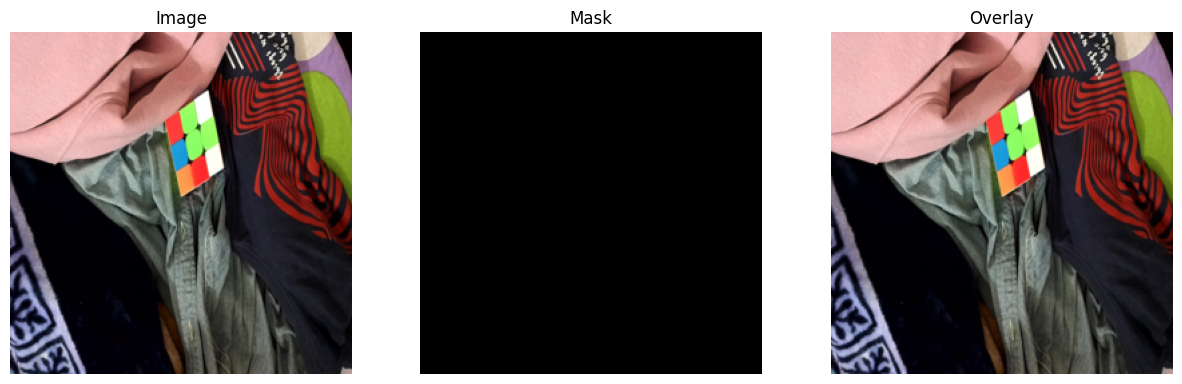

x1 823 y1 231 x2 1245 y2 653


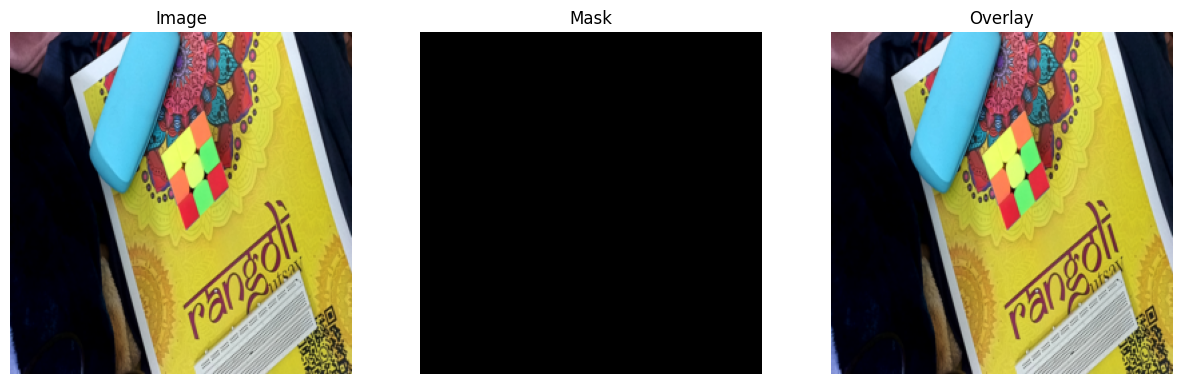

x1 875 y1 257 x2 1167 y2 549


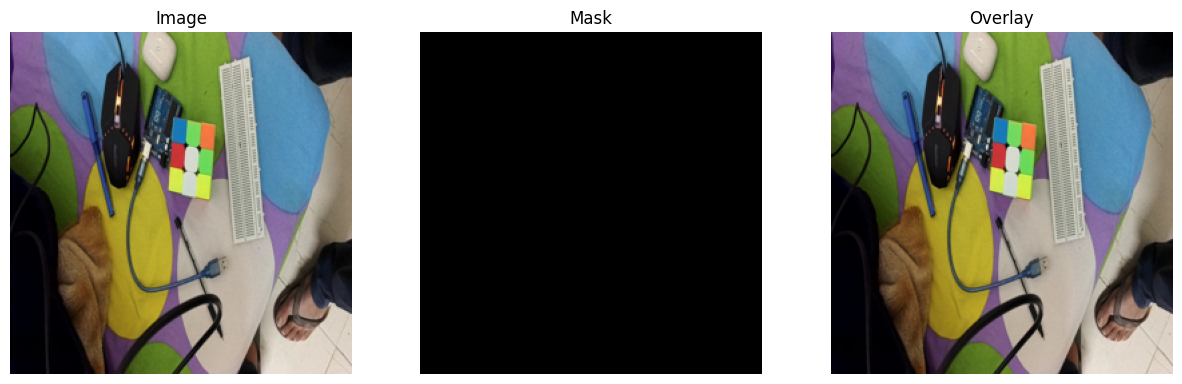

x1 897 y1 364 x2 1211 y2 678


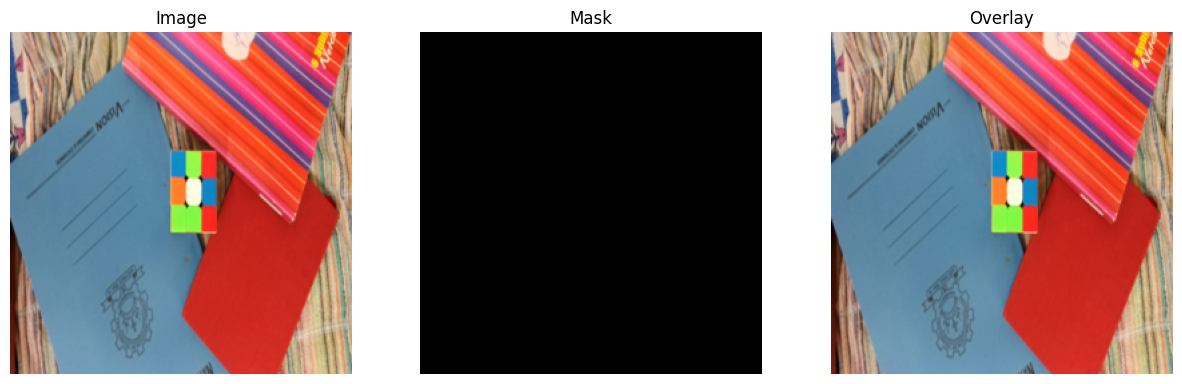

In [4]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from torchvision import transforms
import random

# Custom Dataset Class
class RubiksCubeDataset(Dataset):
    def __init__(self, root_dir, transform=None, mask_transform=None):
        self.root_dir = root_dir
        self.images_dir = os.path.join(root_dir, 'images')
        self.labels_dir = os.path.join(root_dir, 'labels')
        
        self.image_files = sorted([
            f for f in os.listdir(self.images_dir) 
            if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))
        ])
        
        self.label_files = []
        for img_file in self.image_files:
            label_file = img_file.rsplit('.', 1)[0] + '.txt'
            label_path = os.path.join(self.labels_dir, label_file)
            if os.path.isfile(label_path):
                self.label_files.append(label_file)
            else:
                raise FileNotFoundError(f"Label file {label_file} not found for image {img_file}")
        
        self.transform = transform
        self.mask_transform = mask_transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        label_name = self.label_files[idx]
        
        img_path = os.path.join(self.images_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        width, height = image.size
        
        label_path = os.path.join(self.labels_dir, label_name)
        with open(label_path, 'r') as f:
            lines = f.readlines()
        
        mask = np.zeros((height, width), dtype=np.uint8)
        
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 5:
                class_id = parts[0]
                if class_id != '0':
                    continue  # Skip other classes if any
                try:
                    # Parse YOLO format: class_id x_center y_center width height
                    x_center_norm, y_center_norm, box_width_norm, box_height_norm = map(float, parts[1:5])
                    
                    # Convert normalized coordinates to pixel values
                    x_center = int(x_center_norm * width)
                    y_center = int(y_center_norm * height)
                    box_width = int(box_width_norm * width)
                    box_height = int(box_height_norm * height)
                    
                    # Enforce square by taking the smaller dimension
                    min_dim = min(box_width, box_height)
                    half_min_dim = min_dim // 2
                    
                    # Calculate top-left and bottom-right coordinates for square
                    x1 = x_center - half_min_dim
                    y1 = y_center - half_min_dim
                    x2 = x_center + half_min_dim
                    y2 = y_center + half_min_dim
                    
                    # Ensure coordinates are within image boundaries
                    x1, x2 = max(0, min(x1, width - 1)), max(0, min(x2, width - 1))
                    y1, y2 = max(0, min(y1, height - 1)), max(0, min(y2, height - 1))
                    
                    print("x1", x1, "y1", y1, "x2", x2, "y2", y2)
                    # Draw filled square on mask
                    cv2.rectangle(mask, (x1, y1), (x2, y2), color=1, thickness=-1)
                except ValueError:
                    print(f"Invalid label format in file {label_name}: '{line}'")
            else:
                print(f"Incomplete label information in file {label_name}: '{line}'")
        
        mask = Image.fromarray(mask)
        
        if self.transform:
            image = self.transform(image)
        if self.mask_transform:
            mask = self.mask_transform(mask)
        
        return image, mask

# Define Transformations
image_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

mask_transforms = transforms.Compose([
    transforms.Resize((256, 256), interpolation=Image.NEAREST),
    transforms.ToTensor()
])

# Initialize Dataset
try:
    dataset = RubiksCubeDataset(
        root_dir='archive',  # Update this path if necessary
        transform=image_transforms,
        mask_transform=mask_transforms
    )
    print(f"Dataset loaded successfully with {len(dataset)} samples.")
except FileNotFoundError as e:
    print(e)
    exit(1)

# Visualization Functions
def denormalize(image_tensor, mean, std):
    for t, m, s in zip(image_tensor, mean, std):
        t.mul_(s).add_(m)
    return image_tensor

def visualize_samples(dataset, num_samples=5):
    indices = random.sample(range(len(dataset)), num_samples)
    
    for idx in indices:
        image, mask = dataset[idx]
        
        image_vis = denormalize(image.clone(), mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
        image_vis = image_vis.permute(1, 2, 0).numpy()
        image_vis = np.clip(image_vis, 0, 1)
        
        mask_np = mask.squeeze().numpy()
        mask_np = (mask_np > 0.5).astype(np.float32)
        mask_np = 1 - mask_np  # Invert mask to show black on white background
        
        # Overlay mask on the image for better visualization
        overlay = image_vis.copy()
        overlay[mask_np == 0] = [1, 1, 1]  # White background for mask
        
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.title('Image')
        plt.imshow(image_vis)
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.title('Mask')
        plt.imshow(mask_np, cmap='gray')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.title('Overlay')
        plt.imshow(overlay)
        plt.axis('off')
        
        plt.show()

# Visualize Samples
visualize_samples(dataset, num_samples=5)

In [5]:
import os
from torch.utils.data import Dataset
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

# Custom Dataset Class
class RubiksCubeDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.images_dir = os.path.join(root_dir, 'images')
        self.labels_dir = os.path.join(root_dir, 'labels')
        
        self.image_files = sorted([
            f for f in os.listdir(self.images_dir) 
            if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))
        ])
        
        self.label_files = []
        for img_file in self.image_files:
            label_file = img_file.rsplit('.', 1)[0] + '.txt'
            label_path = os.path.join(self.labels_dir, label_file)
            if os.path.isfile(label_path):
                self.label_files.append(label_file)
            else:
                raise FileNotFoundError(f"Label file {label_file} not found for image {img_file}")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        label_name = self.label_files[idx]
        
        img_path = os.path.join(self.images_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        width, height = image.size
        
        label_path = os.path.join(self.labels_dir, label_name)
        with open(label_path, 'r') as f:
            lines = f.readlines()
        
        mask = np.zeros((height, width), dtype=np.uint8)
        
        for line in lines:
            parts = line.strip().split()
            if len(parts) >= 5:
                class_id = parts[0]
                if class_id != '0':
                    continue  # Skip other classes if any
                try:
                    # Parse YOLO format: class_id x_center y_center width height
                    x_center_norm, y_center_norm, box_width_norm, box_height_norm = map(float, parts[1:5])
                    
                    # Convert normalized coordinates to pixel values
                    x_center = int(x_center_norm * width)
                    y_center = int(y_center_norm * height)
                    box_width = int(box_width_norm * width)
                    box_height = int(box_height_norm * height)
                    
                    # Enforce square by taking the smaller dimension
                    min_dim = min(box_width, box_height)
                    half_min_dim = min_dim // 2
                    
                    # Calculate top-left and bottom-right coordinates for square
                    x1 = x_center - half_min_dim
                    y1 = y_center - half_min_dim
                    x2 = x_center + half_min_dim
                    y2 = y_center + half_min_dim
                    
                    # Ensure coordinates are within image boundaries
                    x1, x2 = max(0, min(x1, width - 1)), max(0, min(x2, width - 1))
                    y1, y2 = max(0, min(y1, height - 1)), max(0, min(y2, height - 1))
                    
                    # Draw filled square on mask
                    cv2.rectangle(mask, (x1, y1), (x2, y2), color=1, thickness=-1)
                except ValueError:
                    print(f"Invalid label format in file {label_name}: '{line}'")
            else:
                print(f"Incomplete label information in file {label_name}: '{line}'")
        
        return image, mask

# Initialize Dataset
try:
    dataset = RubiksCubeDataset(root_dir='archive')  # Update this path if necessary
    print(f"Dataset loaded successfully with {len(dataset)} samples.")
except FileNotFoundError as e:
    print(e)
    exit(1)

# Visualization Function
def visualize_samples(dataset, num_samples=5):
    indices = random.sample(range(len(dataset)), num_samples)
    
    for idx in indices:
        image, mask = dataset[idx]
        
        image_vis = np.array(image)
        
        mask_np = np.array(mask)
        mask_np = (mask_np > 0).astype(np.float32)
        mask_np = 1 - mask_np  # Invert mask to show black on white background
        
        # Overlay mask on the image for better visualization
        overlay = image_vis.copy()
        overlay[mask_np == 0] = [255, 255, 255]  # White background for mask
        
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.title('Image')
        plt.imshow(image_vis)
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.title('Mask')
        plt.imshow(mask_np, cmap='gray')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.title('Overlay')
        plt.imshow(overlay)
        plt.axis('off')
        
        plt.show()

# Visualize Samples
visualize_samples(dataset, num_samples=5)

Label file 72 (1).txt not found for image 72 (1).jpg
x1 808 y1 27 x2 1264 y2 483


IndexError: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 1